In [1]:
import numpy as np
import skimage.io as io
import random
import matplotlib.pyplot as plt



**IMPORTING DATASET**



In [2]:
!curl -O http://images.cocodataset.org/zips/train2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 18.0G  100 18.0G    0     0  54.0M      0  0:05:40  0:05:40 --:--:-- 48.0M


In [3]:
!curl -O http://images.cocodataset.org/zips/val2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  777M  100  777M    0     0  50.2M      0  0:00:15  0:00:15 --:--:-- 57.2M


In [4]:
!curl -O http://images.cocodataset.org/annotations/annotations_trainval2017.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  241M  100  241M    0     0  68.5M      0  0:00:03  0:00:03 --:--:-- 68.5M


In [5]:
from pycocotools.coco import COCO

In [ ]:
!unzip train2017.zip

In [ ]:
!unzip val2017.zip

In [ ]:
!unzip annotations_trainval2017.zip

In [9]:
ann_file="annotations/instances_val2017.json"
coco=COCO(ann_file)
catIDs = coco.getCatIds()
cats = coco.loadCats(catIDs)
print(cats)

loading annotations into memory...
Done (t=0.86s)
creating index...
index created!
[{'supercategory': 'person', 'id': 1, 'name': 'person'}, {'supercategory': 'vehicle', 'id': 2, 'name': 'bicycle'}, {'supercategory': 'vehicle', 'id': 3, 'name': 'car'}, {'supercategory': 'vehicle', 'id': 4, 'name': 'motorcycle'}, {'supercategory': 'vehicle', 'id': 5, 'name': 'airplane'}, {'supercategory': 'vehicle', 'id': 6, 'name': 'bus'}, {'supercategory': 'vehicle', 'id': 7, 'name': 'train'}, {'supercategory': 'vehicle', 'id': 8, 'name': 'truck'}, {'supercategory': 'vehicle', 'id': 9, 'name': 'boat'}, {'supercategory': 'outdoor', 'id': 10, 'name': 'traffic light'}, {'supercategory': 'outdoor', 'id': 11, 'name': 'fire hydrant'}, {'supercategory': 'outdoor', 'id': 13, 'name': 'stop sign'}, {'supercategory': 'outdoor', 'id': 14, 'name': 'parking meter'}, {'supercategory': 'outdoor', 'id': 15, 'name': 'bench'}, {'supercategory': 'animal', 'id': 16, 'name': 'bird'}, {'supercategory': 'animal', 'id': 17, 'n

In [10]:
def getclassname(classId,cats):
  for i in range(len(cats)):
    if cats[i]['id']==classId:
      return cats[i]['name']
  return "None"
print('The class name is', getclassname(77, cats)) 

The class name is cell phone


In [ ]:
filterClasses = [ 'person']
catIds = coco.getCatIds(catNms=filterClasses);
imgIds = coco.getImgIds(catIds=catIds);
print(imgIds)
#print("Number of images containing all required classes:", len(imgIds))

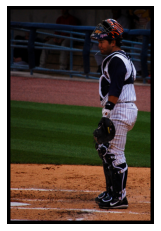

In [47]:

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
I=io.imread('val2017/{}'.format(img['file_name']))/255.0
# Or use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

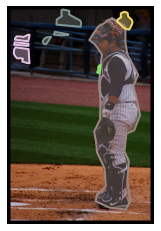

In [48]:
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

**Masking of Annotation Image**

1
1
1
1
1
Unique pixel values in the mask are: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


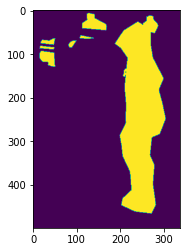

In [50]:
filterClasses = ['person']
mask = np.zeros((img['height'],img['width']))

for i in range(len(anns)):
    print(anns[i]['category_id'])
    className = getclassname(anns[i]['category_id'], cats)
    pixel_value = filterClasses.index(className)+1
    
    mask = np.maximum(coco.annToMask(anns[i])*pixel_value, mask)
plt.imshow(mask)
#print(pixel_value = filterClasses.index(className)+1)
#print(coco.annToMask(anns[1]))
print('Unique pixel values in the mask are:', mask)

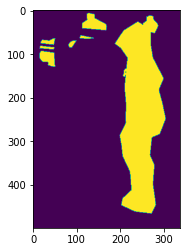

In [51]:
mask=np.zeros((img['height'],img['width']))
for i in range(len(anns)):
  mask=np.maximum(coco.annToMask(anns[i]),mask)
plt.imshow(mask)  

# Data Generation

In [45]:
def filterDataset(folder, classes=None, mode='train'):    
    # initialize COCO api for instance annotations
    annFile = 'annotations/instances_{}2017.json'.format(mode)
    coco = COCO(annFile)
    
    images = []
    if classes!=None:
        # iterate for each individual class in the list
        for className in classes:
            # get all images containing given categories
            catIds = coco.getCatIds(catNms=className)
            imgIds = coco.getImgIds(catIds=catIds)
            images += coco.loadImgs(imgIds)
    
    else:
        imgIds = coco.getImgIds()
        images = coco.loadImgs(imgIds)
    
    # Now, filter out the repeated images
    unique_images = []
    for i in range(len(images)):
        if images[i] not in unique_images:
            unique_images.append(images[i])
            
    random.shuffle(unique_images)
    dataset_size = len(unique_images)
    
    return unique_images, dataset_size, coco

In [46]:
mode='train'
classes=['person']
images, dataset_size, coco = filterDataset(classes,mode)

loading annotations into memory...
Done (t=25.16s)
creating index...
index created!


KeyboardInterrupt: ignored